In [326]:
import numpy as np
import pandas as pd

In [327]:
df=pd.read_csv("/content/spam.csv",encoding="latin-1")

In [328]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [330]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [331]:
df.columns=["label","text"]

In [332]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [333]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [334]:
df.duplicated().sum()

403

In [335]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='label'>

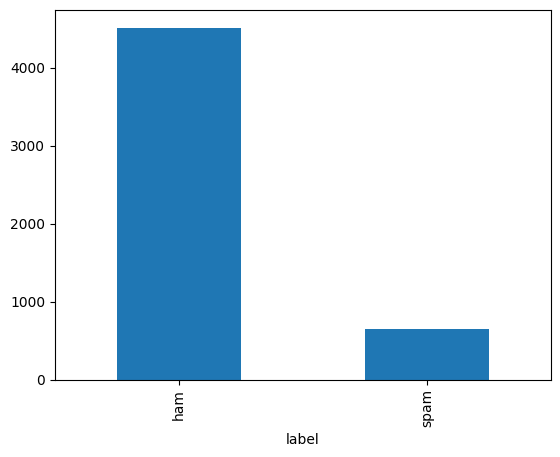

In [336]:
df["label"].value_counts().plot(kind="bar")

In [337]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["label"]=le.fit_transform(df["label"])

There is a class imbalance in the dataset

In [338]:
import nltk

In [339]:
from nltk import word_tokenize,sent_tokenize

In [340]:
a=df["text"].apply(word_tokenize)

In [341]:
df["num_words"]=a.apply(len)

In [342]:
df

,label,text,num_words
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35
5568,0,Will Ì_ b going to esplanade fr home?,9
5569,0,"Pity, * was in mood for that. So...any other s...",15
5570,0,The guy did some bitching but I acted like i'd...,27


In [343]:
b=df["text"].apply(sent_tokenize)


In [344]:
df["num_sent"]=b.apply(len)

In [345]:
df.head()

,label,text,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",24,2
1,0,Ok lar... Joking wif u oni...,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,0,U dun say so early hor... U c already then say...,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1


In [346]:
df["num_chars"]=df["text"].apply(len)

In [347]:
df.groupby("label").describe()

num_words                                                     num_sent  \
          count       mean        std  min   25%   50%   75%    max    count   
label                                                                          
0        4516.0  17.123782  13.493970  1.0   8.0  13.0  22.0  220.0   4516.0   
1         653.0  27.667688   7.008418  2.0  25.0  29.0  32.0   46.0    653.0   

                 ...            num_chars                                      \
           mean  ...  75%   max     count        mean        std   min    25%   
label            ...                                                            
0      1.820195  ...  2.0  38.0    4516.0   70.459256  56.358207   2.0   34.0   
1      2.970904  ...  4.0   9.0     653.0  137.891271  30.137753  13.0  132.0   

                            
         50%    75%    max  
label                       
0       52.0   90.0  910.0  
1      149.0  157.0  224.0  

[2 rows x 24 columns]

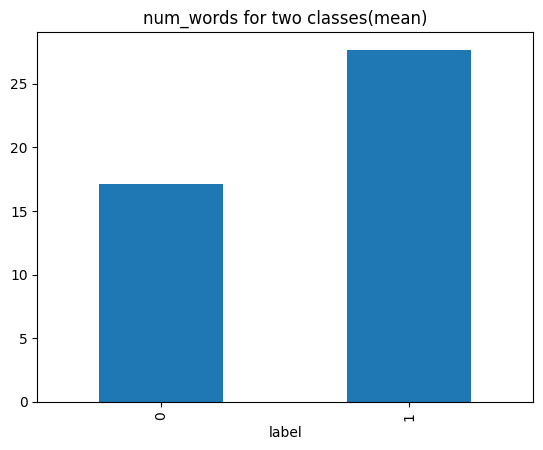

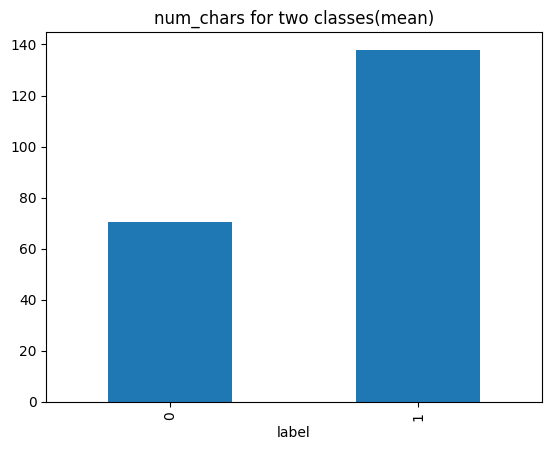

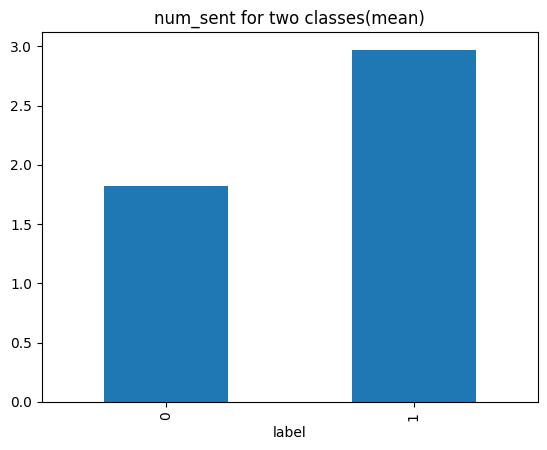

In [348]:
import matplotlib.pyplot as plt
import seaborn as sns
columns=["num_words","num_chars","num_sent"]
for col in columns:
      df.groupby("label")[col].mean().plot(kind="bar",title=f"{col} for two classes(mean)")
      plt.show()


Spam mails usually contains more sentences than non-spam mails.

In [350]:
cf=df.drop(columns=["text"])

<Axes: >

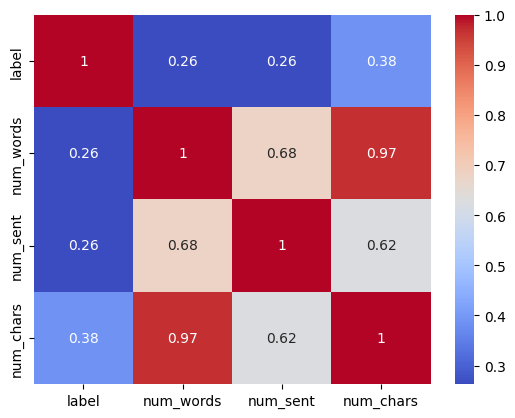

In [351]:
import seaborn as sns
sns.heatmap(cf.corr(),annot=True,cmap="coolwarm")

label shows a pretty good correlation with num_chars


In [352]:
import re
import string

In [353]:
def clean_text(text):
  text=text.lower()
  text=re.sub(r"http\S+","",text)
  text=nltk.word_tokenize(text)

  for i in text:
    if not i.isalnum():
      text.remove(i)

  for i in text:
    if i in string.punctuation:
      text.remove(i)


  return " ".join(text)

In [354]:
df["preprocessed_text"]=df["text"].apply(clean_text)

In [355]:
df.head()

,label,text,num_words,num_sent,num_chars,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah i do think he goes to usf he lives around ...


In [357]:
from sklearn.feature_extraction.text import CountVectorizer
TF=CountVectorizer()


In [358]:
X=TF.fit_transform(df["preprocessed_text"]).toarray()

In [359]:
y=df["label"].values

In [360]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [361]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [362]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [363]:
def evaluate_model(model):
  y_pred=model.predict(X_test)
  from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
  print("accuracy_score: " ,accuracy_score(y_test,y_pred))
  sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
  plt.show()
  print(classification_report(y_test,y_pred))

accuracy_score:  0.97678916827853


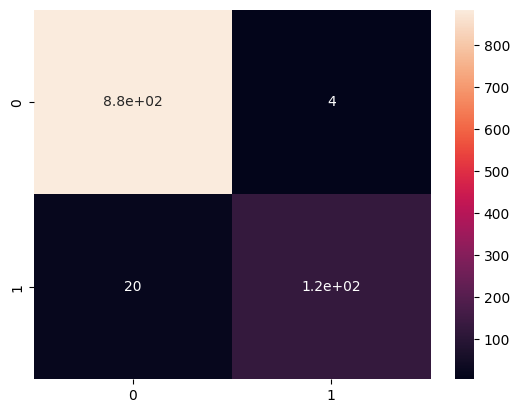

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.97      0.86      0.91       145

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [364]:
evaluate_model(lr)

We want a high recall in spam mails category. Also the f1-score needs to be optimized accordingly.

In [365]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
nb=MultinomialNB()
gb=GaussianNB()
nb.fit(X_train,y_train)
gb.fit(X_train,y_train)

GaussianNB()

accuracy_score:  0.9777562862669246


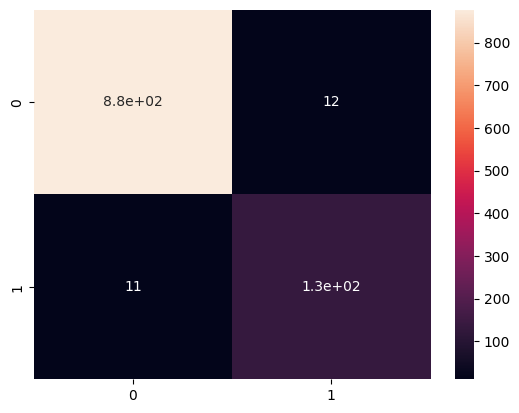

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       889
           1       0.92      0.92      0.92       145

    accuracy                           0.98      1034
   macro avg       0.95      0.96      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [366]:
evaluate_model(nb)

accuracy_score:  0.8974854932301741


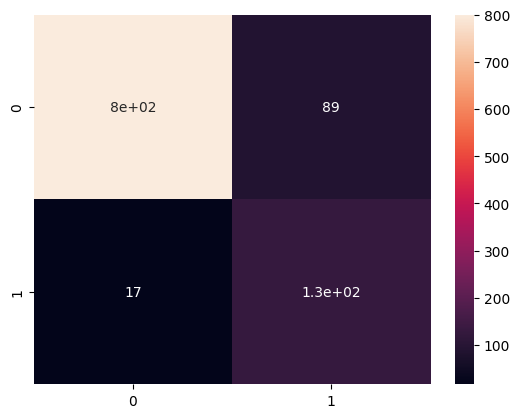

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       889
           1       0.59      0.88      0.71       145

    accuracy                           0.90      1034
   macro avg       0.78      0.89      0.82      1034
weighted avg       0.92      0.90      0.91      1034



In [367]:
evaluate_model(gb)

In [387]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,max_depth=None)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

accuracy_score:  0.971953578336557


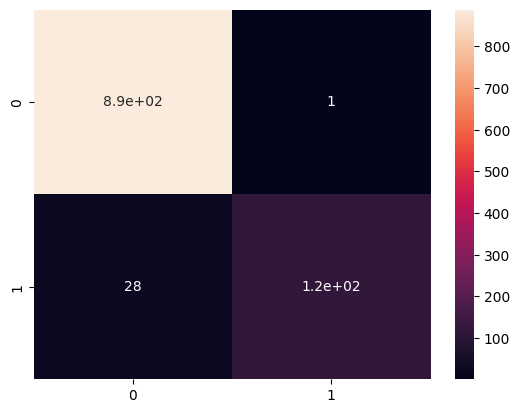

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [388]:
evaluate_model(rf)

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


accuracy_score:  0.9787234042553191


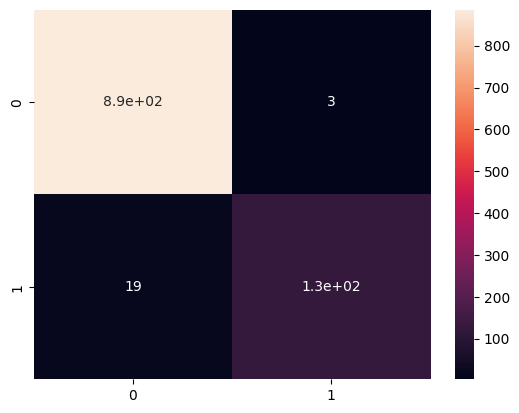

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.87      0.92       145

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [392]:
from imblearn.ensemble import BalancedBaggingClassifier
bbc=BalancedBaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100),
                              sampling_strategy="auto",
                              replacement=False,
                              random_state=42)
bbc.fit(X_train,y_train)
evaluate_model(bbc)


accuracy_score:  0.9729206963249516


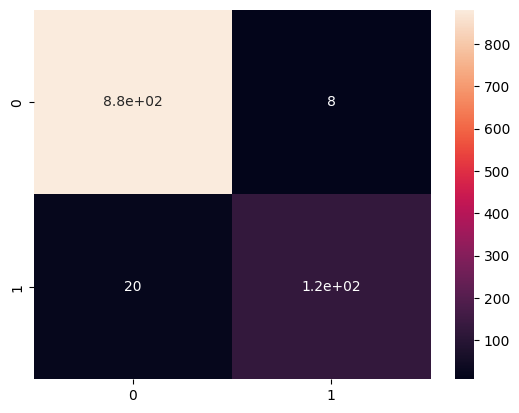

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       889
           1       0.94      0.86      0.90       145

    accuracy                           0.97      1034
   macro avg       0.96      0.93      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [393]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
evaluate_model(xgb)